# Gradiente Descendente Paralelo 
#### Estudo de Abordagens de Implementação
---
**Créditos:**
 Adaptação do código original desenvolvido por [Angad Gill](https://github.com/angadgill) e [Sharath Rao](https://github.com/sharathrao13) com base no paper de Zinkevich, M., Weimer, M., Li, L., & Smola, A. (2010). [Parallelized stochastic gradient descent](http://papers.nips.cc/paper/4006-parallelized-stochastic-gradient-descent). 

## Dataset

Dataset Diamonds, blablablab
~52000 observações com 8 características e preços correspondentes de diamantes, para regressão linear.

In [12]:
%matplotlib inline
from sklearn.datasets import make_regression
from sklearn.model_selection import ShuffleSplit
import numpy as np
from matplotlib import pyplot as plt

In [13]:
n_samples = 1000
n_features = 100
seed = 1
effective_rank = 100

In [4]:
n_samples = 1000
n_features = 100
seed = 1
effective_rank = 100

In [5]:
X, y = make_regression(n_samples=n_samples, n_features=n_features, 
                       random_state=seed, noise=0.0, effective_rank=effective_rank)

Preparação dos conjuntos para treinamento e testes:

In [15]:
rs = ShuffleSplit(n_splits=5, test_size=.2, random_state=0)

In [16]:
for train_index, test_index in rs.split(X):
    pass

In [17]:
X_train = X[train_index]
X_test = X[test_index]
y_train = y[train_index]
y_test = y[test_index]

## 
## SGD "Normal" (baseline)

Treinameno do modelo com coleta da taxa de acurácia a cada iteração:

In [19]:
from sklearn.linear_model import SGDRegressor

In [31]:
# Número máximo de iterações:
n_iter = 5000

In [33]:
# Modelo dde regressão do SciKit-Learn
sgd = SGDRegressor(max_iter = n_iter, tol = 0.001)

In [34]:
# Treinamento do modelo e estatísticas
%time sgd.fit(X_train, y_train)

CPU times: user 558 ms, sys: 3.98 ms, total: 561 ms
Wall time: 563 ms


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=5000,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=0.001, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [25]:
# Acurácia 
sgd.score(X_test, y_test)

In [37]:
# Availiação
scores_base = []
sgd = SGDRegressor(max_iter=1, tol=0.001, warm_start=True)
for i in range(n_iter):
    sgd.partial_fit(X_train, y_train)
    scores_base += [sgd.score(X_test, y_test)]

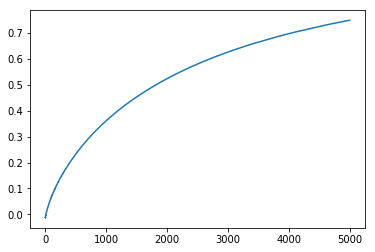

In [38]:
plt.plot(range(len(scores_base)), scores_base)

In [35]:
# acurácia final, obtida sobre o conjunto de testes:
scores_base[-1]

0.7492405508612383


# SGD Paralelo
Comparação de diferentes abordagens de paralelização

In [47]:
from joblib import Parallel, delayed
import utils
import importlib
importlib.reload(utils)

<module 'utils' from '/home/jeff/github/pgd_samples/Parallel-SGD/utils.py'>

### Cenário 1
Neste cenário o dataset é dividido em partes iguais e cada uma é atribuída a um worker. Os pesos (parâmetros) finais são calculados uma única vez quando todos terminam o processamento.

In [42]:
# Quantidade de workers
n_jobs = 4

# Treinamento
%time scores = utils.sim_parallel_sgd(X_train, y_train, X_test, y_test, n_iter, n_jobs, split_per_job=1/n_jobs, overlap=False)

dados para o fitting
[ 6.22979323e+00  1.47163803e+00 -4.71984329e+00 -1.48215571e+00
  3.78644763e+00 -6.16031780e+00  4.40921574e+00  2.47251749e+00
  2.27713092e+00 -2.67999345e+00  1.59545215e+00  1.85318493e+00
  1.09421378e+00  4.15966302e+00 -3.11244615e+00 -2.40627077e+00
 -2.95918412e+00 -7.93459633e+00  5.95704027e+00  4.31018541e+00
 -2.17064415e+00  1.83722273e+00 -1.01204124e+00  5.24296751e+00
  1.06168539e+00 -3.02776688e+00  2.33235638e+00  1.65040726e+00
 -2.59929647e+00 -4.75019164e+00  1.97405785e+00 -3.28902017e+00
 -2.63247409e+00 -4.58835529e+00 -2.65208878e+00 -6.06534116e+00
 -2.64714613e+00 -7.31272556e+00 -2.03872872e+00  1.11610377e+01
 -1.04808492e+00 -2.31385366e+00  5.96620095e+00 -1.19117752e+00
 -1.26744680e+00  1.92092598e+00  2.31001767e+00 -2.75229157e+00
  3.17791753e+00 -7.54427986e+00  1.58661828e+00  1.29479307e+00
  4.12066887e+00 -5.46071984e-01  8.02315381e+00  3.54912624e+00
  1.71883854e+00  9.67392838e-01  6.58954184e+00 -9.45977148e+00
  4.

NotFittedError: This SGDRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.